Suspect score is a part of the weightage (apart from the base model) where we analyse if the texts are AI generated or not,  by analysing linguistic and stylometric features. The scores might increase on decrease depending on the parametric conditions.

In this code, we have performed an EDA to analyse what all aspects and its range can be considered, in order to judge if the document is AI generated or Human Generated.

In [1]:
import pandas as pd
import json
with open('test01.json') as f:   #test01.json file contains both Human and AI generated legal cases
    data = json.load(f)

In [ ]:
#Converting .json file into dataframes
df1 = pd.DataFrame(data)
df1 = df1.rename(columns={0: "file"})
df1 = df1.assign(label=1)
for i in range(100,200):
    df1.label[i] = 0
df = df1.reindex()
df.reset_index(drop=True, inplace=True)

In [3]:
#Label "1" defines AI generated case and Label "0" defines Human generated case
df.head()

,file,label
0,In the Texas Court of Criminal Appeals under c...,1
1,"IN THE COURT OF CRIMINAL APPEALS OF TEXAS, CAS...",1
2,"In the Criminal Appeals Court of Texas, two se...",1
3,In the Texas Court of Criminal Appeals case nu...,1
4,"In the Texas Court of Criminal Appeals, Case N...",1


In [ ]:

rows_to_print = [195]

for index in rows_to_print:
    print(f"Row {index}: {df['file'][index]}\n")


**Analysis 1: tfidf score analysis.**

In [ ]:
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloading NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenize and preprocess the text
    words = re.findall(r'\b\w+\b', text.lower())

    # Removing stop words using NLTK
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]

    # Removing numeric tokens
    filtered_words = [word for word in filtered_words if not word.isdigit()]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return ' '.join(lemmatized_words)

df['processed_text'] = df['file'].apply(preprocess_text)

# Calculate TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['processed_text'])

# Extract the maximum TF-IDF value for each row
max_tfidf_values = np.max(tfidf_matrix, axis=1).toarray().flatten()

# Adding a new column 'max_tfidf' to your DataFrame with the maximum TF-IDF values
df['max_tfidf'] = max_tfidf_values

# Display the updated DataFrame
print(df[['file', 'processed_text', 'max_tfidf']])


In [6]:
df.head()

,file,label,processed_text,max_tfidf
0,In the Texas Court of Criminal Appeals under c...,1,texas court criminal appeal case number pd app...,0.571737
1,"IN THE COURT OF CRIMINAL APPEALS OF TEXAS, CAS...",1,court criminal appeal texas case wr applicant ...,0.330431
2,"In the Criminal Appeals Court of Texas, two se...",1,criminal appeal court texas two separate case ...,0.459565
3,In the Texas Court of Criminal Appeals case nu...,1,texas court criminal appeal case number pd app...,0.383894
4,"In the Texas Court of Criminal Appeals, Case N...",1,texas court criminal appeal case pd state texa...,0.395465


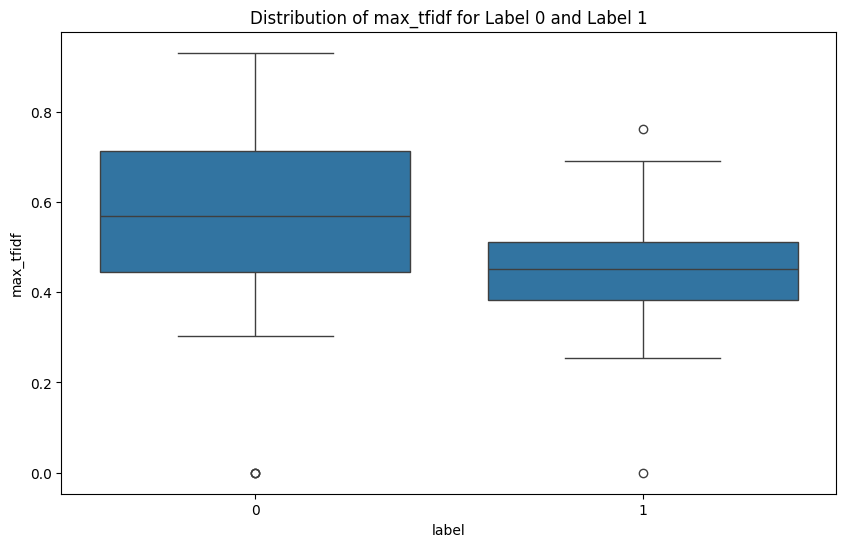

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='max_tfidf', data=df)
plt.title('Distribution of max_tfidf for Label 0 and Label 1')
plt.show()


We can see that  human-generated text has a higher distribution of tfidf measure than AI-generated text. This means that human-generated text tends to use a wider variety of words, while AI-generated text tends to be more repetitive.

**Analysis 2: Linguistic Features**


Total words distribution: Shows the spread of text lengths, with humans generally having more variability.

Unique words distribution: Highlights the unique vocabulary used, with humans showing a wider range of words used once.

Lexical diversity distribution: Compares unique words to total words, reflecting vocabulary richness, with humans generally having higher diversity.

Most common word count distribution: Shows how often the most used word appears, with humans exhibiting more diverse usage patterns compared to AI's potential overuse of specific words.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


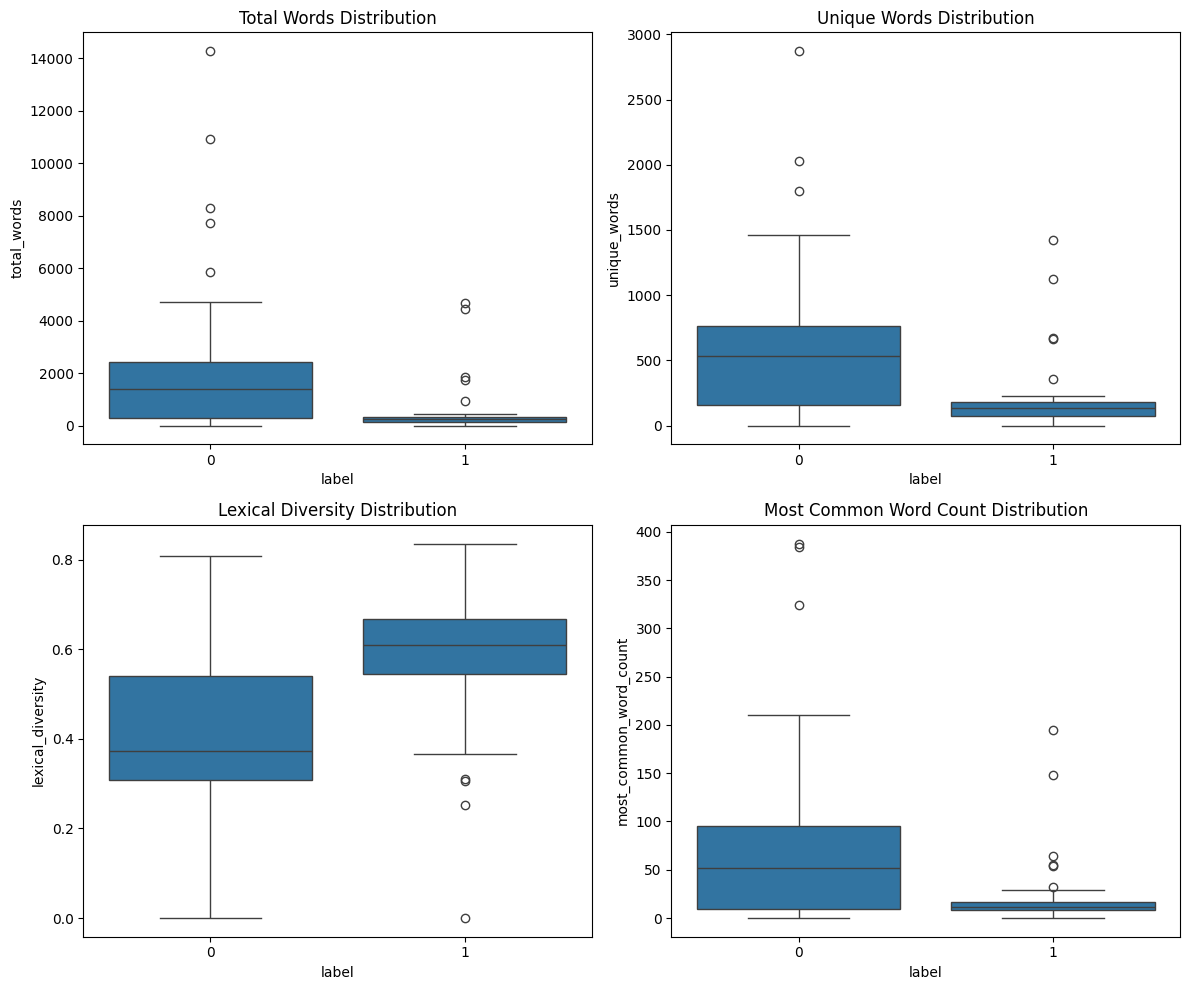

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize


#Taking a new dataframe df2
df2 = df1.reindex()
df2.reset_index(drop=True, inplace=True)

# Downloading NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
def preprocess_text(text):
    words = re.findall(r'\b\w+\b', text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    filtered_words = [word for word in filtered_words if not word.isdigit()]
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)

# Function to calculate vocabulary richness metrics
def calculate_vocabulary_metrics(text):
    words = word_tokenize(text.lower())
    total_words = len(words)
    unique_words = len(set(words))
    lexical_diversity = unique_words / total_words if total_words > 0 else 0

    # Word frequency distribution
    fdist = FreqDist(words)
    most_common_word, most_common_word_count = fdist.most_common(1)[0] if len(fdist) > 0 else (None, 0)

    return {
        'total_words': total_words,
        'unique_words': unique_words,
        'lexical_diversity': lexical_diversity,
        'most_common_word': most_common_word,
        'most_common_word_count': most_common_word_count
    }


# Apply preprocessing to each document
df2['processed_text'] = df2['file'].apply(preprocess_text)

# Calculate vocabulary richness metrics for each document
df2['vocabulary_metrics'] = df2['processed_text'].apply(calculate_vocabulary_metrics)

# Extract specific metrics to separate columns
df2['total_words'] = df2['vocabulary_metrics'].apply(lambda x: x['total_words'])
df2['unique_words'] = df2['vocabulary_metrics'].apply(lambda x: x['unique_words'])
df2['lexical_diversity'] = df2['vocabulary_metrics'].apply(lambda x: x['lexical_diversity'])
df2['most_common_word'] = df2['vocabulary_metrics'].apply(lambda x: x['most_common_word'])
df2['most_common_word_count'] = df2['vocabulary_metrics'].apply(lambda x: x['most_common_word_count'])

# Visualizing vocabulary richness metrics for each label using box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.boxplot(x='label', y='total_words', data=df2, ax=axes[0, 0])
axes[0, 0].set_title('Total Words Distribution')

sns.boxplot(x='label', y='unique_words', data=df2, ax=axes[0, 1])
axes[0, 1].set_title('Unique Words Distribution')

sns.boxplot(x='label', y='lexical_diversity', data=df2, ax=axes[1, 0])
axes[1, 0].set_title('Lexical Diversity Distribution')

sns.boxplot(x='label', y='most_common_word_count', data=df2, ax=axes[1, 1])
axes[1, 1].set_title('Most Common Word Count Distribution')

plt.tight_layout()
plt.show()


The boxplots align with the common understanding that human-generated text tends to be more diverse and varied in vocabulary use compared to AI-generated text. Humans employ a wider range of words, with less frequent repetition, while AI-generated text often exhibits limitations in vocabulary richness and can be more repetitive.

**Analysis 3: Stylometric features**

Compares the occurrence and types of named entities (people, locations, organizations) mentioned. Humans might reference real-world entities in different contexts than AI models trained on specific datasets.

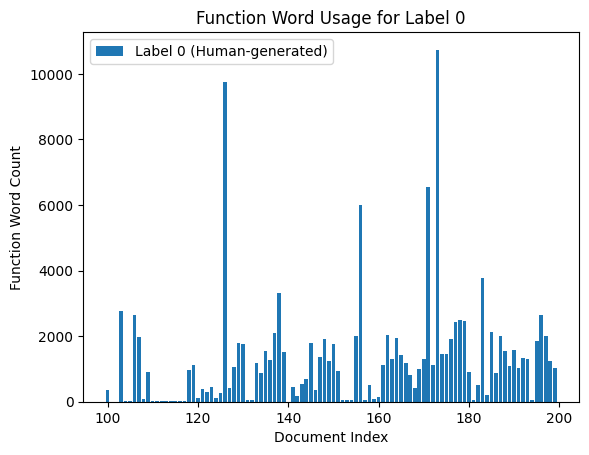

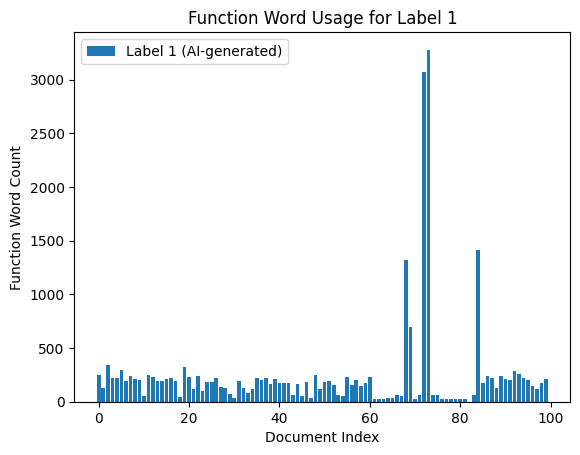

In [34]:
!pip install spacy
!python -m spacy download en_core_web_sm

import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# Tokenize and preprocess the documents
df2['tokenized_text'] = df2['file'].apply(word_tokenize)

# Define a list of function words (you can extend this list)
function_words = set(stopwords.words('english') + ['a', 'an', 'the', 'it', 'they', 'he', 'she', 'is', 'was', 'at', 'on', 'in', 'to', 'for', 'with', 'and', 'or', 'but'])

# Calculate the frequency of function words for each document
df2['function_word_counts'] = df2['tokenized_text'].apply(lambda tokens: sum(1 for token in tokens if token.lower() in function_words))

# Create separate DataFrames for Label 0 and Label 1
df_label_0 = df2[df2['label'] == 0]
df_label_1 = df2[df2['label'] == 1]

# Visualize function word usage for Label 0
plt.bar(df_label_0.index, df_label_0['function_word_counts'], label='Label 0 (Human-generated)')
plt.xlabel('Document Index')
plt.ylabel('Function Word Count')
plt.title('Function Word Usage for Label 0')
plt.legend()
plt.show()

# Visualize function word usage for Label 1
plt.bar(df_label_1.index, df_label_1['function_word_counts'], label='Label 1 (AI-generated)')
plt.xlabel('Document Index')
plt.ylabel('Function Word Count')
plt.title('Function Word Usage for Label 1')
plt.legend()
plt.show()


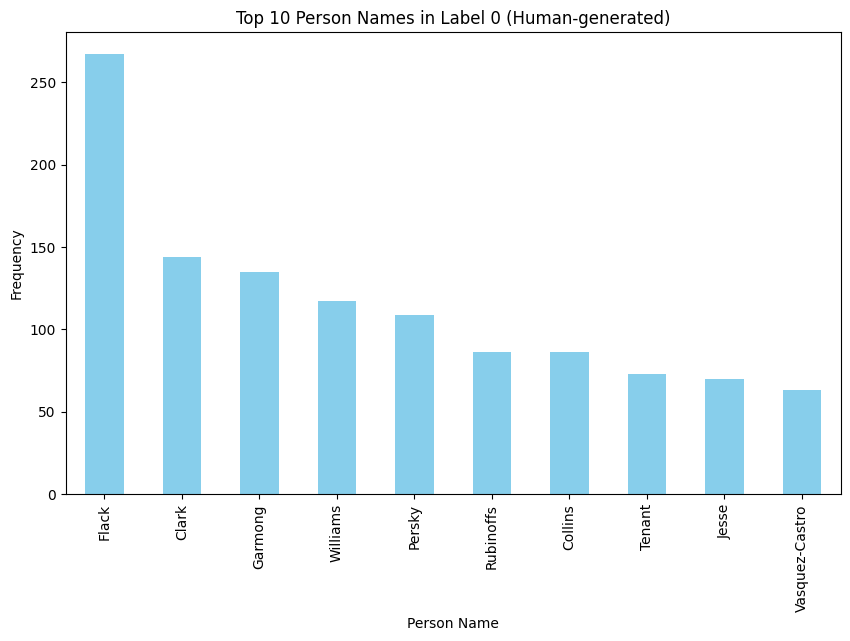

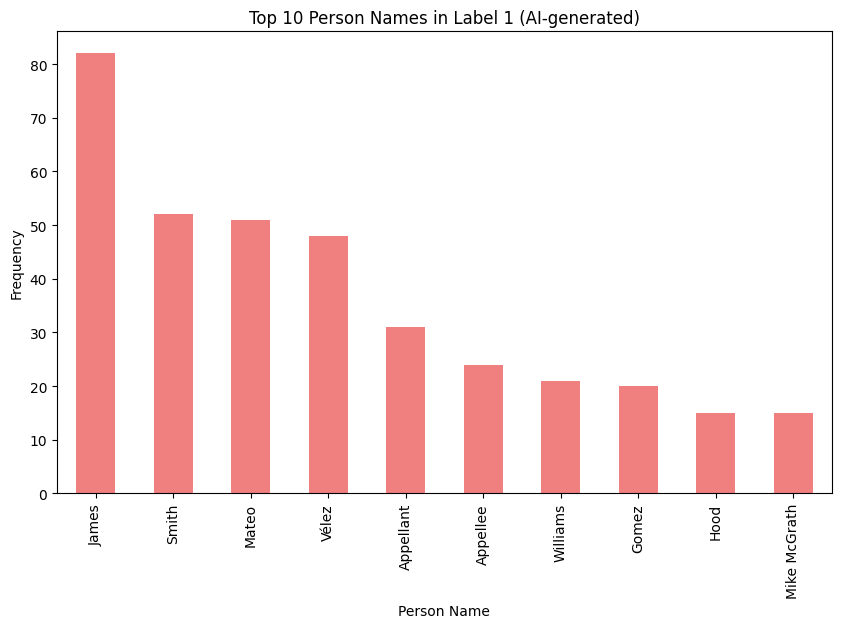

In [30]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to extract person names from a text using spaCy
def extract_person_names(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == 'PERSON']

# Apply the function to each document in the DataFrame
df2['person_names'] = df2['file'].apply(extract_person_names)

# Separate DataFrames for Label 0 and Label 1
df_label_0 = df2[df2['label'] == 0]
df_label_1 = df2[df2['label'] == 1]

# Flatten the list of person names for each label
all_person_names_label_0 = [name for names_list in df_label_0['person_names'] for name in names_list]
all_person_names_label_1 = [name for names_list in df_label_1['person_names'] for name in names_list]

# Calculate the frequency of each person name for each label
name_counts_label_0 = pd.Series(all_person_names_label_0).value_counts()
name_counts_label_1 = pd.Series(all_person_names_label_1).value_counts()

# Visualize the top 10 person names for Label 0
name_counts_label_0.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Person Name')
plt.ylabel('Frequency')
plt.title('Top 10 Person Names in Label 0 (Human-generated)')
plt.show()

# Visualize the top 10 person names for Label 1
name_counts_label_1.head(10).plot(kind='bar', figsize=(10, 6), color='lightcoral')
plt.xlabel('Person Name')
plt.ylabel('Frequency')
plt.title('Top 10 Person Names in Label 1 (AI-generated)')
plt.show()


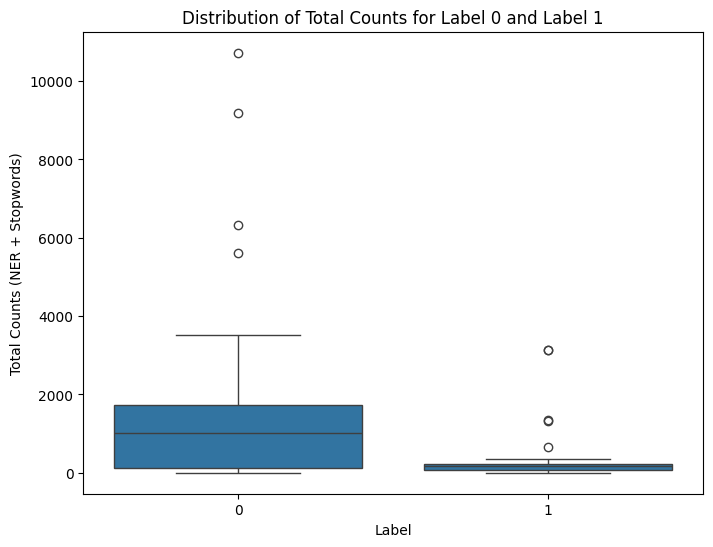

In [32]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords


# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to extract person names from a text using spaCy
def extract_person_names(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == 'PERSON']

# Function to count stopwords in a text
def count_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    return sum(1 for token in tokens if token.lower() in stop_words)

# Appling the functions to each document in the DataFrame
df2['person_names'] = df2['file'].apply(extract_person_names)
df2['stopword_counts'] = df2['file'].apply(count_stopwords)

# Creating a new column for total NER and stopwords counts
df2['total_counts'] = df2['person_names'].apply(len) + df2['stopword_counts']

# Creating boxplots for total counts for Label 0 and Label 1
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='total_counts', data=df2)
plt.xlabel('Label')
plt.ylabel('Total Counts (NER + Stopwords)')
plt.title('Distribution of Total Counts for Label 0 and Label 1')
plt.show()


# **Insights:**

The boxplots support the common belief that human-generated text is more diverse and varied in vocabulary use than AI-generated text. Humans use a broader range of words with less repetition, whereas AI-generated text frequently lacks vocabulary richness and can be more repetitive.  

  

It is very useful to analyze which parameters/ranges can be used to determine whether the document is AI generated or human generated.   

Future work includes observing and establishing a consistent parameter range.